In [2]:

import matplotlib.pyplot as plt

%matplotlib inline

def funcaoPlot(imagens, title=None):
    fig, ax = plt.subplots(1, len(imagens), figsize=(60, 60))
    for i, folha in enumerate(imagens):
        ax[i].imshow(folha, cmap="gray")
        if title:
            ax[i].set_title(title[i])
        else:
            ax[i].set_title(str(i))

In [3]:
from skimage.io import imread_collection

leshimania = imread_collection('dataset/meanshift/predictions/positivo/*orig.png')
notleshimania = imread_collection('dataset/meanshift/predictions/negativo/*orig.png')

In [5]:
len(leshimania)

34192

In [6]:
len(notleshimania)

37953

In [10]:
notleshimania[0].dtype

dtype('uint8')

In [17]:
leshimania[2].min()

20

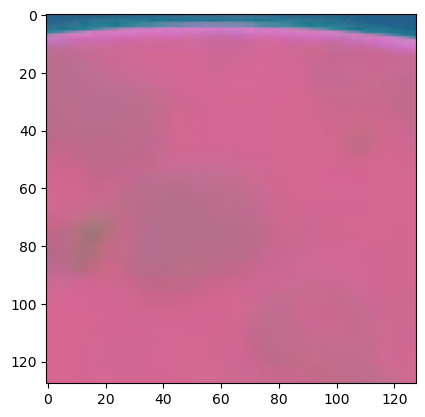

In [14]:
plt.imshow(leshimania[2], cmap="gray")

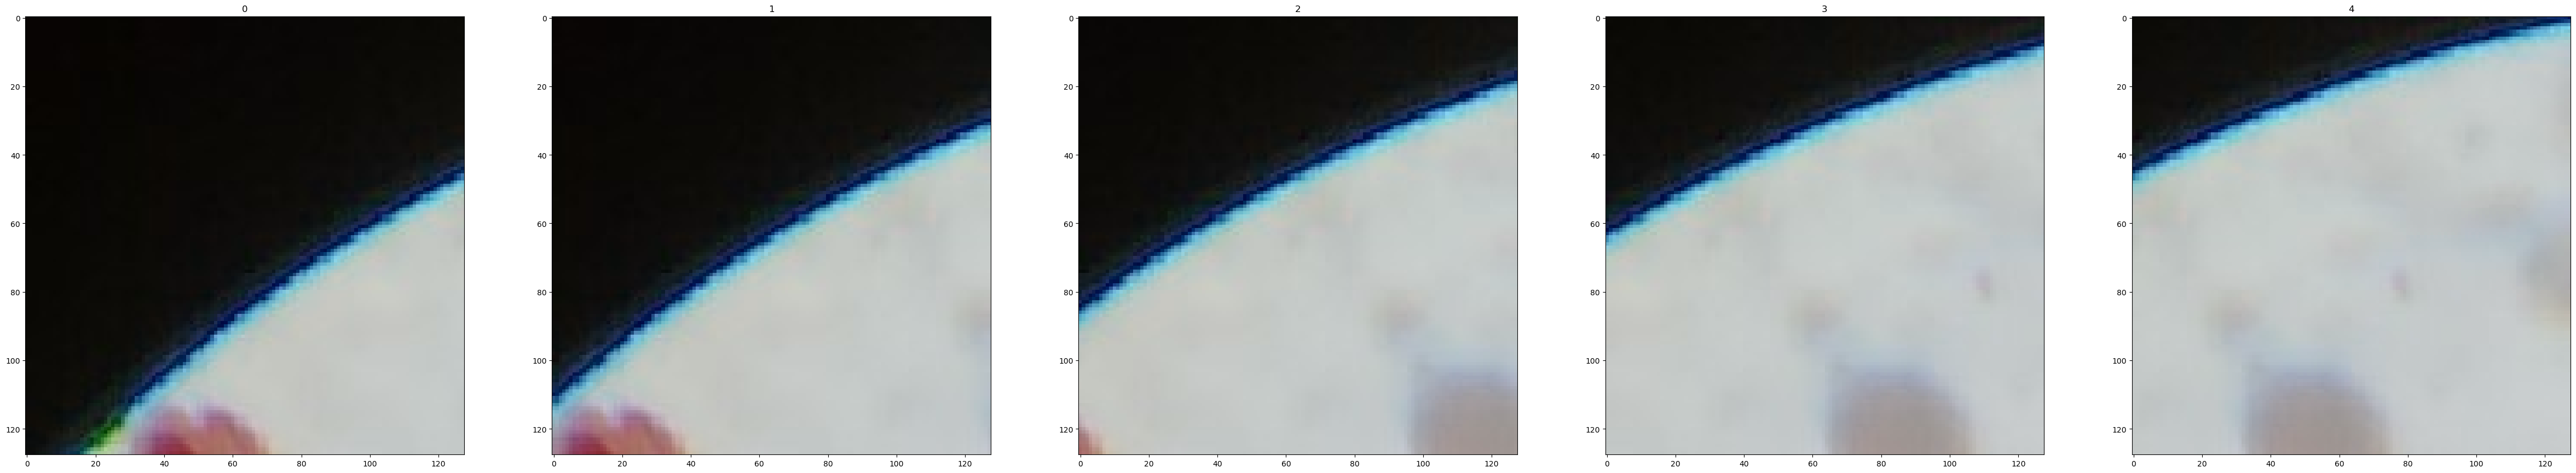

In [15]:
funcaoPlot(notleshimania[:5])

In [ ]:

from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np


def generate_hitogram(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i, j]] += 1
    return hist


def normalize_image(image):
    # Encontre o valor mínimo e máximo na imagem
    min_val = image.min()
    max_val = image.max()

    normalized_image = 255 * (image - min_val) / (max_val - min_val)

    return normalized_image.astype(np.uint8)

def pre_processing(img):
    gray = rgb2gray(img)
    return (resize(gray, (384, 384), anti_aliasing=True) * 255).astype(np.uint8)

In [ ]:
leshimania_gray = [pre_processing(img) for img in leshimania]
notleshimania_gray = [pre_processing(img) for img in notleshimania]

funcaoPlot(leshimania_gray[:5])


In [ ]:
def alargamento(img, k, e): 
    img[img==0] = 1
    return 1/(1 + (k/img) **e)

leshimania_alargamento_1 = [alargamento(img, 80*2, 80) for img in leshimania_gray]
leshimania_alargamento_2 = [alargamento(img, 90*2, 90) for img in leshimania_gray]
leshimania_alargamento_3 = [alargamento(img, 95*2, 95) for img in leshimania_gray]
leshimania_alargamento_4 = [alargamento(img, 100*2, 100) for img in leshimania_gray]

notleshimania_alargamento_1 = [alargamento(img, 80*2, 80) for img in notleshimania_gray]
notleshimania_alargamento_2 = [alargamento(img, 90*2, 90) for img in notleshimania_gray]
notleshimania_alargamento_3 = [alargamento(img, 95*2, 95) for img in notleshimania_gray]
notleshimania_alargamento_4 = [alargamento(img, 100*2, 100) for img in notleshimania_gray]



funcaoPlot([leshimania_alargamento_1[0], leshimania_alargamento_2[0], leshimania_alargamento_3[0], leshimania_alargamento_4[0]])

O alargamento de contraste serve para realcar os pixels. Ao variar os valores de "k" e "e" em cada imagem podemos notar
que pixels ficam mais proximos de preto e branco, deixando descatacados a parte da imagem mais proximo de branco. Dentro desses parametros, o "e" é o que mais influencia o realce.

k: Este parâmetro controla a escala do alargamento. Valores maiores de k tenderão a reduzir o efeito do alargamento, enquanto valores menores ampliarão mais a imagem
e: Este parâmetro controla a forma da função de alargamento. Valores menores de e tenderão a produzir alargamentos mais suaves, enquanto valores maiores produzirão alargamentos.

In [ ]:
def negativo(img):
    return img.max() - img

leshimania_negativo = [negativo(img) for img in leshimania_gray]
notleshimania_negativo = [negativo(img) for img in notleshimania_gray]

funcaoPlot([leshimania_negativo[0], leshimania_gray[0]])

O negativo de uma imagem é uma transformação que inverte os valores de intensidade dos pixels. Onde o pixel mais escuro se torna o mais claro e vice-versa.

In [ ]:
def logaritmo(img, c):
    return c * np.log(1 + img)

leshimania_logaritmo_1 = [logaritmo(img, 1) for img in leshimania_gray]
leshimania_logaritmo_2 = [logaritmo(img, 2) for img in leshimania_gray]
leshimania_logaritmo_3 = [logaritmo(img, 3) for img in leshimania_gray]
leshimania_logaritmo_4 = [logaritmo(img, 4) for img in leshimania_gray]

notleshimania_logaritmo_1 = [logaritmo(img, 1) for img in notleshimania_gray]
notleshimania_logaritmo_2 = [logaritmo(img, 2) for img in notleshimania_gray]
notleshimania_logaritmo_3 = [logaritmo(img, 3) for img in notleshimania_gray]
notleshimania_logaritmo_4 = [logaritmo(img, 4) for img in notleshimania_gray]

funcaoPlot([leshimania_logaritmo_1[0], leshimania_logaritmo_2[0], leshimania_logaritmo_3[0], leshimania_logaritmo_4[0]])

O logaritmo de uma imagem é uma transformação que comprime os valores de intensidade dos pixels.

c: Este parâmetro controla a escala da transformação. Valores maiores de c tenderão a reduzir o efeito da transformação, enquanto valores menores ampliarão mais a imagem.

In [ ]:
def potencia(img, c, y):
    return c * (img ** y)

leshimania_potencia_1 = [potencia(img, 1*5, 1) for img in leshimania_gray]
leshimania_potencia_2 = [potencia(img, 1*5, 2) for img in leshimania_gray]
leshimania_potencia_3 = [potencia(img, 1*5, 3) for img in leshimania_gray]
leshimania_potencia_4 = [potencia(img, 1*5, 4) for img in leshimania_gray]

notleshimania_potencia_1 = [potencia(img, 1*5, 1) for img in notleshimania_gray]
notleshimania_potencia_2 = [potencia(img, 1*5, 2) for img in notleshimania_gray]
notleshimania_potencia_3 = [potencia(img, 1*5, 3) for img in notleshimania_gray]
notleshimania_potencia_4 = [potencia(img, 1*5, 4) for img in notleshimania_gray]

funcaoPlot([leshimania_potencia_1[0], leshimania_potencia_2[0], leshimania_potencia_3[0], leshimania_potencia_4[0]])

A transformação de potência é uma transformação que comprime os valores de intensidade dos pixels. 

c: Este parâmetro controla a escala da transformação. Valores maiores de c tenderão a reduzir o efeito da transformação, enquanto valores menores ampliarão mais a imagem.
y: Este parâmetro controla a forma da transformação. Valores menores de y tenderão a produzir transformações mais suaves, enquanto valores maiores produzirão transformações mais abruptas.

In [ ]:
leshimania_alargamento_1_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_alargamento_1]
leshimania_alargamento_2_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_alargamento_2]
leshimania_alargamento_3_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_alargamento_3]
leshimania_alargamento_4_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_alargamento_4]

notleshimania_alargamento_1_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_alargamento_1]
notleshimania_alargamento_2_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_alargamento_2]
notleshimania_alargamento_3_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_alargamento_3]
notleshimania_alargamento_4_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_alargamento_4]

leshimania_negativo_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_negativo]
notleshimania_negativo_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_negativo]

leshimania_logaritmo_1_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_logaritmo_1]
leshimania_logaritmo_2_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_logaritmo_2]
leshimania_logaritmo_3_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_logaritmo_3]
leshimania_logaritmo_4_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_logaritmo_4]

notleshimania_logaritmo_1_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_logaritmo_1]
notleshimania_logaritmo_2_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_logaritmo_2]
notleshimania_logaritmo_3_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_logaritmo_3]
notleshimania_logaritmo_4_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_logaritmo_4]

leshimania_potencia_1_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_potencia_1]
leshimania_potencia_2_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_potencia_2]
leshimania_potencia_3_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_potencia_3]
leshimania_potencia_4_hist = [generate_hitogram(normalize_image(img)) for img in leshimania_potencia_4]

notleshimania_potencia_1_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_potencia_1]
notleshimania_potencia_2_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_potencia_2]
notleshimania_potencia_3_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_potencia_3]
notleshimania_potencia_4_hist = [generate_hitogram(normalize_image(img)) for img in notleshimania_potencia_4]

Comparando os histogramas

In [ ]:
hist_img = leshimania_alargamento_1_hist[0]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].bar(range(256), hist_img)
ax[0].set_xlabel("Intensidade")
ax[0].set_ylabel("Frequencia")
ax[0].set_title("Histograma Customizado")

ax[1].hist(leshimania_alargamento_1[0].ravel(), bins=256)
ax[1].set_xlabel("Intensidade")
ax[1].set_ylabel("Frequencia")
ax[1].set_title("Histograma Original")


### Atributos de Textura de 1$^a$ ordem:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def histogram_features(hist):
    mean = np.mean(hist)
    var = np.var(hist)
    skewness = skew(hist)
    kurt = kurtosis(hist, fisher=False)
    ent = entropy(hist)

    energy = np.sum(hist ** 2, dtype=np.uint8)

    return [mean, var, skewness, kurt, energy, ent]

In [ ]:
leshimania_alargamento_1_feature = [histogram_features(hist) for hist in leshimania_alargamento_1_hist]
leshimania_alargamento_2_feature = [histogram_features(hist) for hist in leshimania_alargamento_2_hist]
leshimania_alargamento_3_feature = [histogram_features(hist) for hist in leshimania_alargamento_3_hist]
leshimania_alargamento_4_feature = [histogram_features(hist) for hist in leshimania_alargamento_4_hist]

notleshimania_alargamento_1_feature = [histogram_features(hist) for hist in notleshimania_alargamento_1_hist]
notleshimania_alargamento_2_feature = [histogram_features(hist) for hist in notleshimania_alargamento_2_hist]
notleshimania_alargamento_3_feature = [histogram_features(hist) for hist in notleshimania_alargamento_3_hist]
notleshimania_alargamento_4_feature = [histogram_features(hist) for hist in notleshimania_alargamento_4_hist]

leshimania_negativo_feature = [histogram_features(hist) for hist in leshimania_negativo_hist]
notleshimania_negativo_feature = [histogram_features(hist) for hist in notleshimania_negativo_hist]

leshimania_logaritmo_1_feature = [histogram_features(hist) for hist in leshimania_logaritmo_1_hist]
leshimania_logaritmo_2_feature = [histogram_features(hist) for hist in leshimania_logaritmo_2_hist]
leshimania_logaritmo_3_feature = [histogram_features(hist) for hist in leshimania_logaritmo_3_hist]
leshimania_logaritmo_4_feature = [histogram_features(hist) for hist in leshimania_logaritmo_4_hist]

notleshimania_logaritmo_1_feature = [histogram_features(hist) for hist in notleshimania_logaritmo_1_hist]
notleshimania_logaritmo_2_feature = [histogram_features(hist) for hist in notleshimania_logaritmo_2_hist]
notleshimania_logaritmo_3_feature = [histogram_features(hist) for hist in notleshimania_logaritmo_3_hist]
notleshimania_logaritmo_4_feature = [histogram_features(hist) for hist in notleshimania_logaritmo_4_hist]

leshimania_potencia_1_feature = [histogram_features(hist) for hist in leshimania_potencia_1_hist]
leshimania_potencia_2_feature = [histogram_features(hist) for hist in leshimania_potencia_2_hist]
leshimania_potencia_3_feature = [histogram_features(hist) for hist in leshimania_potencia_3_hist]
leshimania_potencia_4_feature = [histogram_features(hist) for hist in leshimania_potencia_4_hist]

notleshimania_potencia_1_feature = [histogram_features(hist) for hist in notleshimania_potencia_1_hist]
notleshimania_potencia_2_feature = [histogram_features(hist) for hist in notleshimania_potencia_2_hist]
notleshimania_potencia_3_feature = [histogram_features(hist) for hist in notleshimania_potencia_3_hist]
notleshimania_potencia_4_feature = [histogram_features(hist) for hist in notleshimania_potencia_4_hist]



In [ ]:
leshimania_alargamento_1_feature

In [ ]:
leshimania_alargamento_2_feature


In [ ]:
leshimania_label = np.ones(len(leshimania_alargamento_1_feature))
notleshimania_label = np.zeros(len(notleshimania_alargamento_1_feature))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc


def classification(X_true,y_true,X_false,y_false, param = None):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X_true, y_true, test_size=0.7, random_state=40)
    X_train_false, X_test_false, y_train_false, y_test_false = train_test_split(X_false, y_false, test_size=0.7, random_state=40)
    
    X_train = np.concatenate((X_train_true,X_train_false), axis=0)
    X_test = np.concatenate((X_test_true,X_test_false), axis=0)
    y_train = np.concatenate((y_train_true,y_train_false), axis=0)
    y_test = np.concatenate((y_test_true,y_test_false), axis=0)
        
    
    
    clf = mlp(random_state=40)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acuracia = acc(y_test,pred)
    return acuracia, param

In [ ]:
alargamento_list_results = []
alargamento_list_results.append(classification(leshimania_alargamento_1_feature,leshimania_label,notleshimania_alargamento_1_feature,notleshimania_label, 1))
alargamento_list_results.append(classification(leshimania_alargamento_2_feature,leshimania_label,notleshimania_alargamento_2_feature,notleshimania_label, 2))
alargamento_list_results.append(classification(leshimania_alargamento_3_feature,leshimania_label,notleshimania_alargamento_3_feature,notleshimania_label, 3))
alargamento_list_results.append(classification(leshimania_alargamento_4_feature,leshimania_label,notleshimania_alargamento_4_feature,notleshimania_label, 4))

alargamento_list_results.sort()
alargamento_list_results

In [ ]:
classification(leshimania_negativo_feature,leshimania_label,notleshimania_negativo_feature,notleshimania_label)

In [ ]:
logaritmo_list_results = []
logaritmo_list_results.append(classification(leshimania_logaritmo_1_feature,leshimania_label,notleshimania_logaritmo_1_feature,notleshimania_label, 1))
logaritmo_list_results.append(classification(leshimania_logaritmo_2_feature,leshimania_label,notleshimania_logaritmo_2_feature,notleshimania_label, 2))
logaritmo_list_results.append(classification(leshimania_logaritmo_3_feature,leshimania_label,notleshimania_logaritmo_3_feature,notleshimania_label, 3))
logaritmo_list_results.append(classification(leshimania_logaritmo_4_feature,leshimania_label,notleshimania_logaritmo_4_feature,notleshimania_label, 4))

logaritmo_list_results.sort()
logaritmo_list_results

In [ ]:
potencia_list_results = []
potencia_list_results.append(classification(leshimania_potencia_1_feature,leshimania_label,notleshimania_potencia_1_feature,notleshimania_label, 1))
potencia_list_results.append(classification(leshimania_potencia_2_feature,leshimania_label,notleshimania_potencia_2_feature,notleshimania_label, 2))
potencia_list_results.append(classification(leshimania_potencia_3_feature,leshimania_label,notleshimania_potencia_3_feature,notleshimania_label, 3))
potencia_list_results.append(classification(leshimania_potencia_4_feature,leshimania_label,notleshimania_potencia_4_feature,notleshimania_label, 4))

potencia_list_results.sort()
potencia_list_results

In [ ]:
leshimania_potencia_1_feature == leshimania_potencia_2_feature

In [ ]:
leshimania_potencia_1_feature[0] == leshimania_potencia_2_feature[0]

In [ ]:
leshimania_potencia_1_feature[0][1] == leshimania_potencia_2_feature[0][1]
